In [2]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid, pidf
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

import pandas as pd
import numpy as np
from scipy import signal

ACC_G = 9.81

sns.set_theme()


$\dot x = v_{long} \cdot cos(\theta)$\
$\dot y = v_{long} \cdot sin(\theta)$\
$\dot\theta = \frac{a_{lat}}{v_{long}}$


$x_{t+1} = x_t + v_{long, t} \cdot cos(\theta) \cdot \Delta t$\
$y_{t+1} = y_t + v_{long, t} \cdot sin(\theta) \cdot \Delta t$\
$\theta_{t+1} = \theta_t + \frac{a_{lat, t}}{v_{long, t}} \cdot \Delta t$


In [34]:
def predict_trajectory(datapath):
    df = pd.read_csv(datapath)
    t = df["t"].to_numpy()
    vEgo = df["vEgo"].to_numpy()
    roll_la = np.sin(df["roll"].to_numpy()) * ACC_G
    target_la = df["targetLateralAcceleration"].to_numpy()
    target_level_la = target_la - roll_la

    # Assume starting at (0, 0) with 0 head angle.
    theta = np.insert(np.cumsum(target_level_la[:-1] / vEgo[:-1] * np.diff(t)), 0, 0)
    x = np.insert(np.cumsum(vEgo[:-1] * np.cos(theta)[:-1] * np.diff(t)), 0, 0)
    y = np.insert(np.cumsum(vEgo[:-1] * np.sin(theta)[:-1] * np.diff(t)), 0, 0)

    return x, y, theta

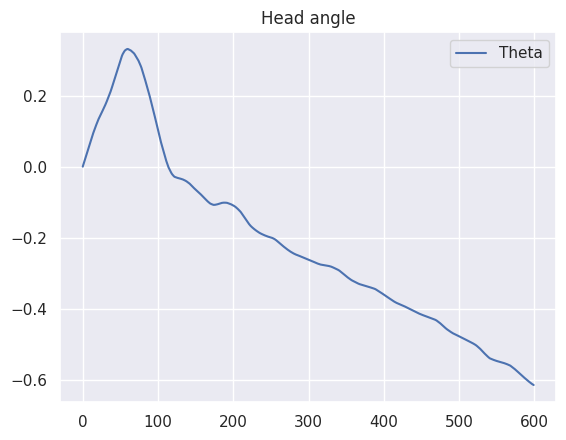

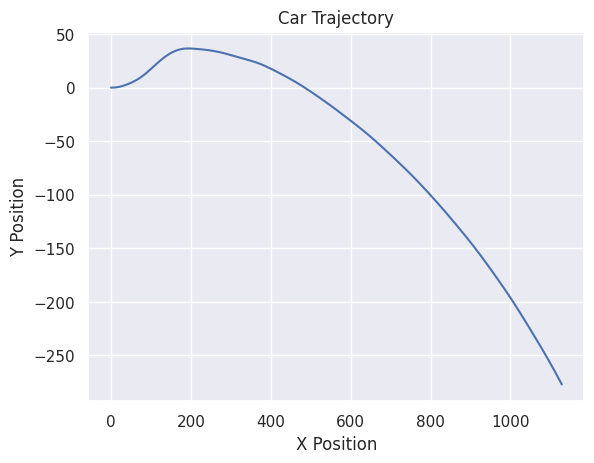

In [37]:
datapath = 'data/00009.csv'
x, y, theta = predict_trajectory(datapath)

plt.plot(theta)
plt.legend(['Theta'])
plt.title('Head angle')
plt.show()

plt.plot(x, y)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Car Trajectory')
plt.show()